# Introduction

We apply both **descriptive** and **inferential statistical analyses**. Additionally, potential issues such as **missing values**, **seasonality**, and **outliers** are handled through appropriate **preprocessing and imputation techniques** to ensure data quality and model performance.

Using various **time series forecasting models** are implemented to predict monthly tourist arrivals for the year **2026**.

By the end of this project, we aim to not only understand historical tourism patterns but also provide actionable forecasts that could assist tourism authorities and stakeholders in strategic planning.


# **1.Explore and prepare data.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")



In [2]:
path = "https://raw.githubusercontent.com/phuthiendao/monthly_vietnam_tourists/refs/heads/main/touristVN.csv"
df_original = pd.read_csv(path)

In [3]:
df = df_original.copy()

In [4]:
print(f"Tourist VN data has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The date range of tourist visit VietNam available is from {df.loc[:,'date'][0]} to {df.loc[:,'date'][len(df) - 1]}\n")
display(df.head())

Tourist VN data has 156 rows and 5 columns.
The date range of tourist visit VietNam available is from 1/1/2013 to 1/12/2025



,date,cruise,road,aviation,total
0,1/1/2013,16000.0,90000.0,545812.0,651812.0
1,1/2/2013,20000.0,88000.0,462476.0,570476.0
2,1/3/2013,21000.0,91000.0,475366.0,587366.0
3,1/4/2013,19571.0,90211.0,504137.0,613919.0
4,1/5/2013,20403.0,113746.0,424602.0,558751.0


In [5]:
# Make sure date column have type datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [6]:
display(df.head())
print("="*100)
display(df.info())
print("="*100)
display(df.describe())

,date,cruise,road,aviation,total
0,2013-01-01,16000.0,90000.0,545812.0,651812.0
1,2013-02-01,20000.0,88000.0,462476.0,570476.0
2,2013-03-01,21000.0,91000.0,475366.0,587366.0
3,2013-04-01,19571.0,90211.0,504137.0,613919.0
4,2013-05-01,20403.0,113746.0,424602.0,558751.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      156 non-null    datetime64[ns]
 1   cruise    135 non-null    float64       
 2   road      135 non-null    float64       
 3   aviation  135 non-null    float64       
 4   total     135 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 6.2 KB


None

,date,cruise,road,aviation,total
count,156,135.000000,135.000000,1.350000e+02,1.350000e+02
mean,2019-06-16 20:18:27.692307712,15716.481481,162263.911111,8.480272e+05,1.026008e+06
min,2013-01-01 00:00:00,8.000000,2356.000000,1.736100e+04,1.972700e+04
25%,2016-03-24 06:00:00,4029.000000,114215.000000,5.324555e+05,6.616550e+05
50%,2019-06-16 00:00:00,10868.000000,146370.000000,8.362000e+05,9.750100e+05
75%,2022-09-08 12:00:00,22584.000000,228222.500000,1.099550e+06,1.372685e+06
max,2025-12-01 00:00:00,80092.000000,354060.000000,1.802352e+06,2.070466e+06
std,NaN,15585.521640,77178.849762,3.837447e+05,4.586870e+05


In [7]:
# Check duplicated
print(f"There are {df.duplicated().sum()} duplicated rows in the dataset.")

There are 0 duplicated rows in the dataset.


In [8]:
# Check missing values in Dataframe
display(df.isnull().sum())

,0
date,0
cruise,21
road,21
aviation,21
total,21


In [9]:
# Print missing data location
missing_data = df[df.isna().any(axis=1)]
print("Missing data location:")
display(missing_data)
print("\nMissing data for the period April 2020 to December 2021 (Covid-19)")

Missing data location:


,date,cruise,road,aviation,total
87,2020-04-01,NaN,NaN,NaN,NaN
88,2020-05-01,NaN,NaN,NaN,NaN
89,2020-06-01,NaN,NaN,NaN,NaN
90,2020-07-01,NaN,NaN,NaN,NaN
91,2020-08-01,NaN,NaN,NaN,NaN
92,2020-09-01,NaN,NaN,NaN,NaN
93,2020-10-01,NaN,NaN,NaN,NaN
94,2020-11-01,NaN,NaN,NaN,NaN
95,2020-12-01,NaN,NaN,NaN,NaN
96,2021-01-01,NaN,NaN,NaN,NaN



Missing data for the period April 2020 to December 2021 (Covid-19)


In [10]:
# Percentage of missing values
df.isnull().sum() * 100 / len(df)

,0
date,0.000000
cruise,13.461538
road,13.461538
aviation,13.461538
total,13.461538


In [11]:
# Missing values ​​ratio of entire DataFrame
total_missing_ratio = df.isnull().sum().sum() / df.size
print(f"Missing values ​​ratio of entire DataFrame: {total_missing_ratio:.2%}")

Missing values ​​ratio of entire DataFrame: 10.77%


We use the data period with full 12 months data, i.e. (2012-2019 and 2022-2025) for data analysis.

#**2.Descriptive statistics.**

In [12]:
# Create columns year, month, quarter.
def add_date_parts(df, date_col='date'):
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['quarter'] = df[date_col].dt.quarter
    return df


In [13]:
df = add_date_parts(df, 'date')

In [14]:
# Define timestamps
pre_covid = pd.to_datetime('2019-12-01')
covid_start = pd.to_datetime('2020-04-01')
covid_end = pd.to_datetime('2021-12-31')
post_covid = pd.to_datetime('2022-01-01')

In [15]:
# Create 'period' column based on timestamps
def classify_period(date):
    if date < covid_start:
        return 'pre_covid'
    elif covid_start <= date <= covid_end:
        return 'covid'
    else:
        return 'post_covid'

df['period'] = df['date'].apply(classify_period)

In [16]:
# Filter data for years 2012–2019 and 2022–2025
df_filtered = df[(df['year'] >= 2012) & ((df['year'] <= 2019) | (df['year'] >= 2022))]

# Total tourists by year
total_tourists_per_year = df_filtered.groupby('year')['total'].sum()

# Total tourist by quarter
total_tourists_per_quarter = df_filtered.groupby('quarter')['total'].sum()

# Total tourists by month
total_tourists_per_month = df_filtered.groupby('month')['total'].sum()

# Average tourists by month
avg_tourists_per_month = df_filtered.groupby('month')['total'].mean()
# Reformat values ​​into regular numbers
avg_tourists_per_month_num = pd.Series(avg_tourists_per_month)
avg_tourists_per_month_num = avg_tourists_per_month_num.apply(lambda x: '{:,.0f}'.format(x))

# Overall monthly average
overall_monthly_avg = avg_tourists_per_month.mean()


In [17]:
from matplotlib.ticker import FuncFormatter

def num_to_str(num, pos=None):
    if num >= 1e6:
        return f'{num/1e6:.2f}M'
    elif num >= 1e4:
        return f'{num/1e3:.2f}k'
    else:
        return str(int(num))

Total number of tourists to Vietnam each year (2012–2019, 2022–2025):



,total
year,
2013,7581564.0
2014,7887013.0
2015,7898852.0
2016,10012735.0
2017,12922151.0
2018,15497791.0
2019,18008591.0
2022,3661222.0
2023,12602434.0


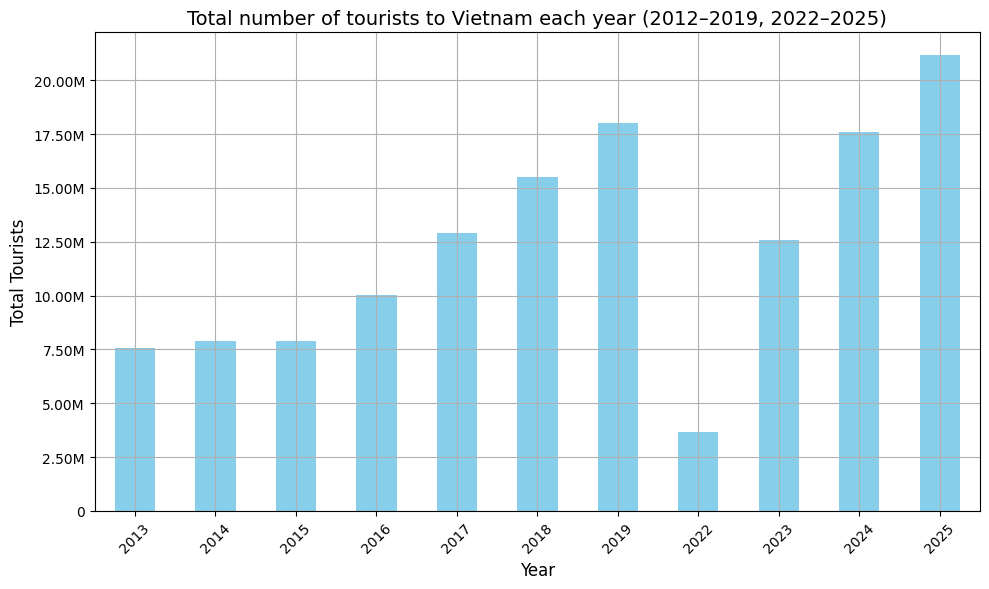

In [18]:
# Print results
print("Total number of tourists to Vietnam each year (2012–2019, 2022–2025):\n")
display(total_tourists_per_year)

# Plot the total number of visitors by year
plt.figure(figsize=(10, 6))
total_tourists_per_year.plot(kind='bar', color='skyblue')
plt.title('Total number of tourists to Vietnam each year (2012–2019, 2022–2025)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Tourists', fontsize=12)

formatter = FuncFormatter(num_to_str)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

Total number of tourists to Vietnam each quarter (2012–2019, 2022–2025):



,total
quarter,
1,34071741.0
2,30656580.0
3,32780180.0
4,37315744.0


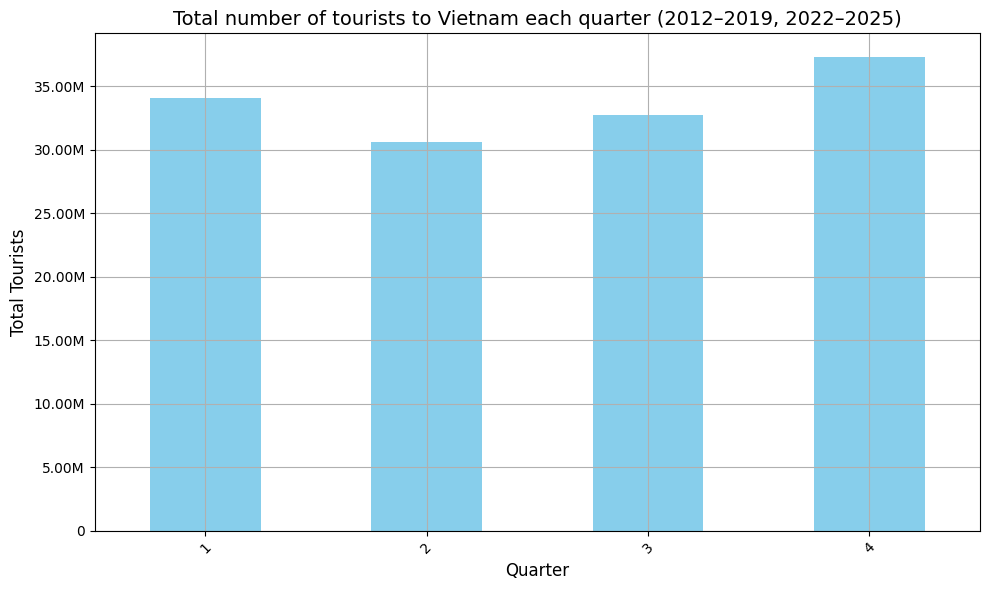

In [19]:
print("Total number of tourists to Vietnam each quarter (2012–2019, 2022–2025):\n")
display(total_tourists_per_quarter)

# Plot the total number of tourists by quarter
plt.figure(figsize=(10, 6))
total_tourists_per_quarter.plot(kind='bar', color='skyblue')
plt.title('Total number of tourists to Vietnam each quarter (2012–2019, 2022–2025)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Tourists', fontsize=12)

formatter = FuncFormatter(num_to_str)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


Average tourists per month:



,total
month,
1,"1,032,436"
2,"1,056,317"
3,"1,008,679"
4,"1,002,638"
5,"912,616"
6,"871,708"
7,"938,156"
8,"1,070,084"
9,"971,776"


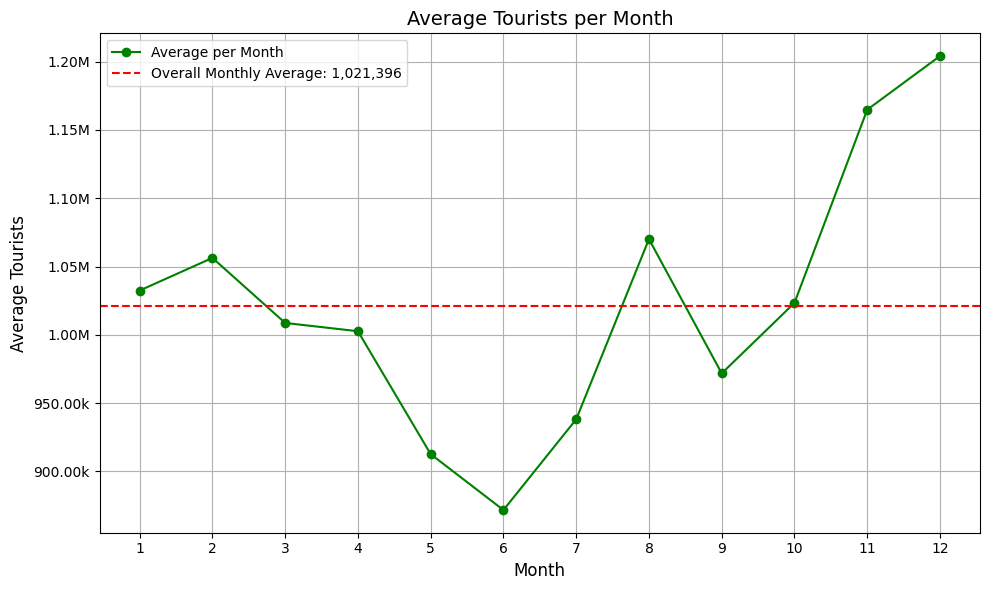

In [20]:
print("\nAverage tourists per month:\n")
display(avg_tourists_per_month_num)

plt.figure(figsize=(10, 6))
plt.plot(avg_tourists_per_month.index, avg_tourists_per_month.values, marker='o', color='green', label='Average per Month')

plt.axhline(overall_monthly_avg, color='red', linestyle='--', label=f'Overall Monthly Average: {overall_monthly_avg:,.0f}')

plt.title('Average Tourists per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Tourists', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(num_to_str))
plt.tight_layout()
plt.show()

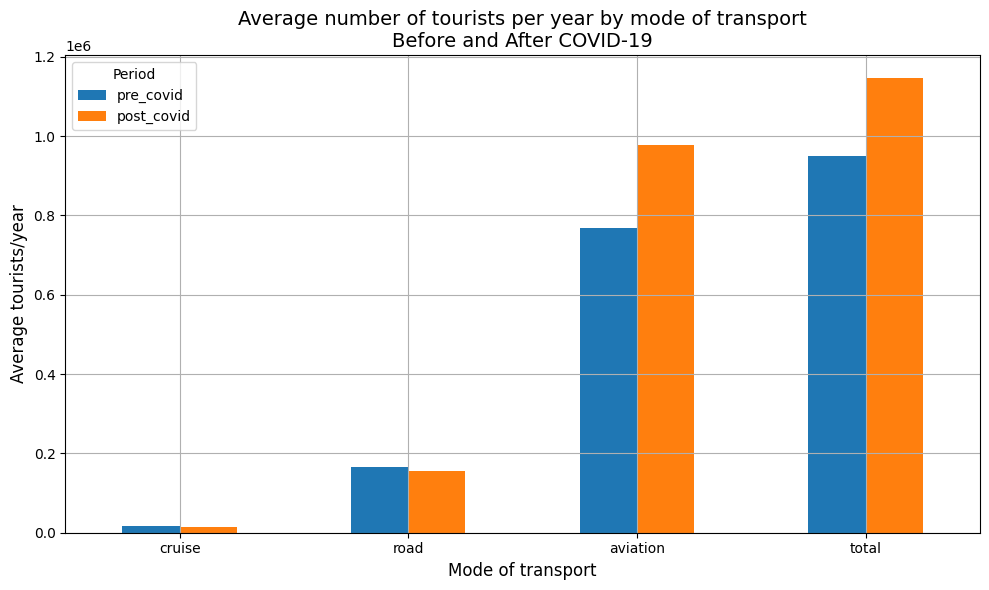

In [21]:
# Split the data into two period
df_pre_covid = df[df['year'] <= 2019]
df_post_covid = df[df['year'] >= 2022]

# Average tourists/year for each period
avg_pre_covid = df_pre_covid[['cruise', 'road', 'aviation', 'total']].mean()
avg_post_covid = df_post_covid[['cruise', 'road', 'aviation', 'total']].mean()

# Create a comparison table of average tourists/year
comparison = pd.DataFrame({
    'pre_covid': avg_pre_covid,
    'post_covid': avg_post_covid
})

comparison.plot(kind='bar', figsize=(10, 6))

plt.title('Average number of tourists per year by mode of transport\nBefore and After COVID-19', fontsize=14)
plt.xlabel('Mode of transport', fontsize=12)
plt.ylabel('Average tourists/year', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Period", loc="upper left")
plt.tight_layout()
plt.grid()
plt.show()

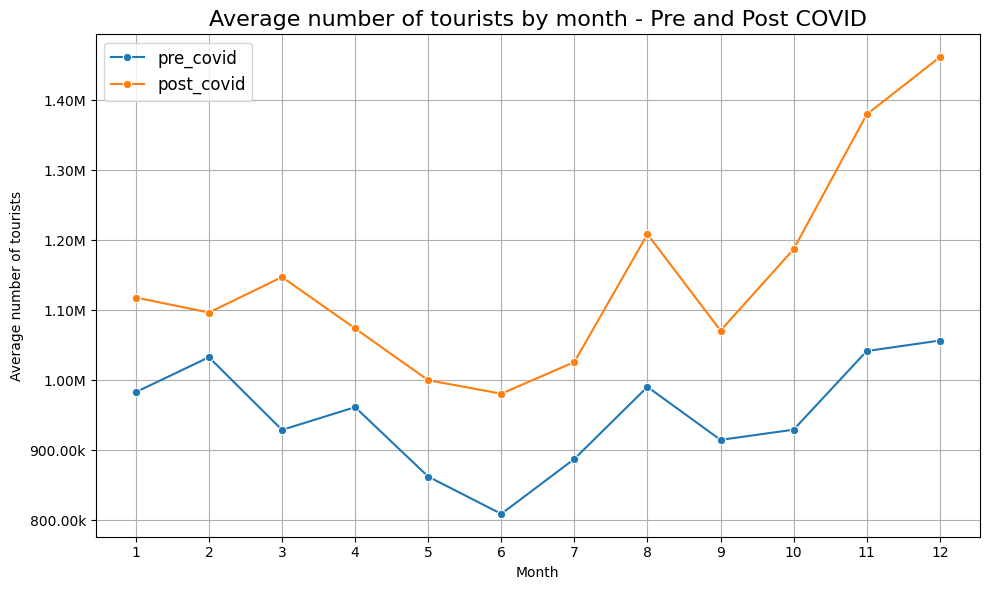

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_filtered, x='month', y='total', hue='period', estimator='mean', ci=None, marker='o')

plt.title('Average number of tourists by month - Pre and Post COVID', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average number of tourists')
plt.xticks(range(1, 13))
plt.gca().yaxis.set_major_formatter(FuncFormatter(num_to_str))
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

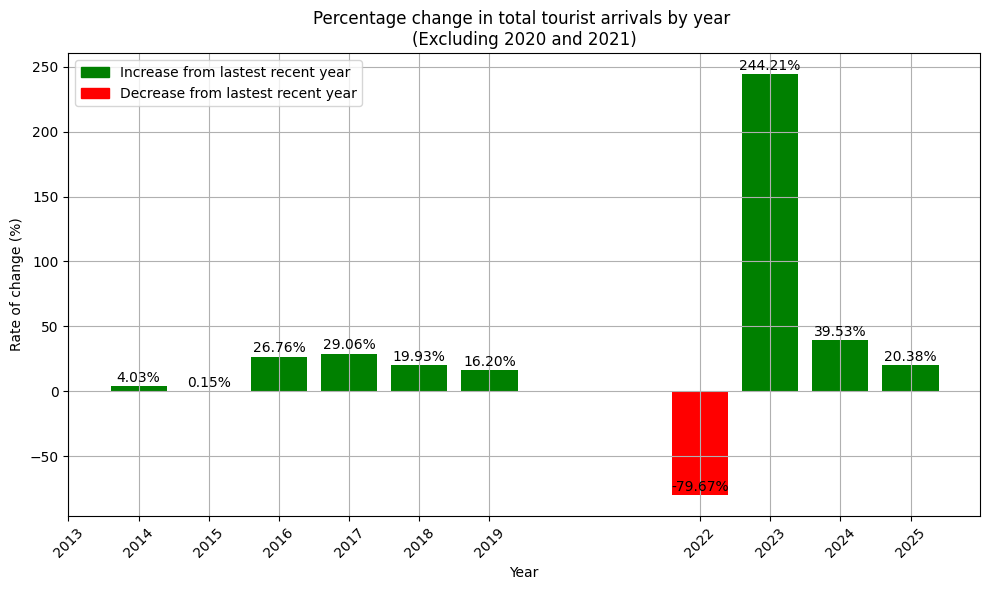

In [23]:
# Sum 'total' by year for filtered data
df_yearly = df_filtered.groupby('year')['total'].sum().reset_index()

# Calculate the % change between years
df_yearly['pct_change'] = df_yearly['total'].pct_change() * 100


if 2022 in df_yearly['year'].values:
    df_yearly.loc[df_yearly['year'] == 2022, 'pct_change'] = (
        (df_yearly.loc[df_yearly['year'] == 2022, 'total'].values[0] -
         df_yearly.loc[df_yearly['year'] == 2019, 'total'].values[0]) /
        df_yearly.loc[df_yearly['year'] == 2019, 'total'].values[0]
    ) * 100


colors = ['green' if x >= 0 else 'red' for x in df_yearly['pct_change']]

plt.figure(figsize=(10,6))
bars = plt.bar(df_yearly['year'], df_yearly['pct_change'], color=colors)

# Add percentage to the top of each column
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 1,
        f'{yval:.2f}%',
        ha='center',
        va='bottom'
    )


plt.title('Percentage change in total tourist arrivals by year \n(Excluding 2020 and 2021)')
plt.xlabel('Year')
plt.ylabel('Rate of change (%)')
plt.xticks(df_yearly['year'], rotation=45)
green_patch = mpatches.Patch(color='green', label='Increase from lastest recent year')
red_patch = mpatches.Patch(color='red', label='Decrease from lastest recent year')
plt.legend(handles=[green_patch, red_patch], loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

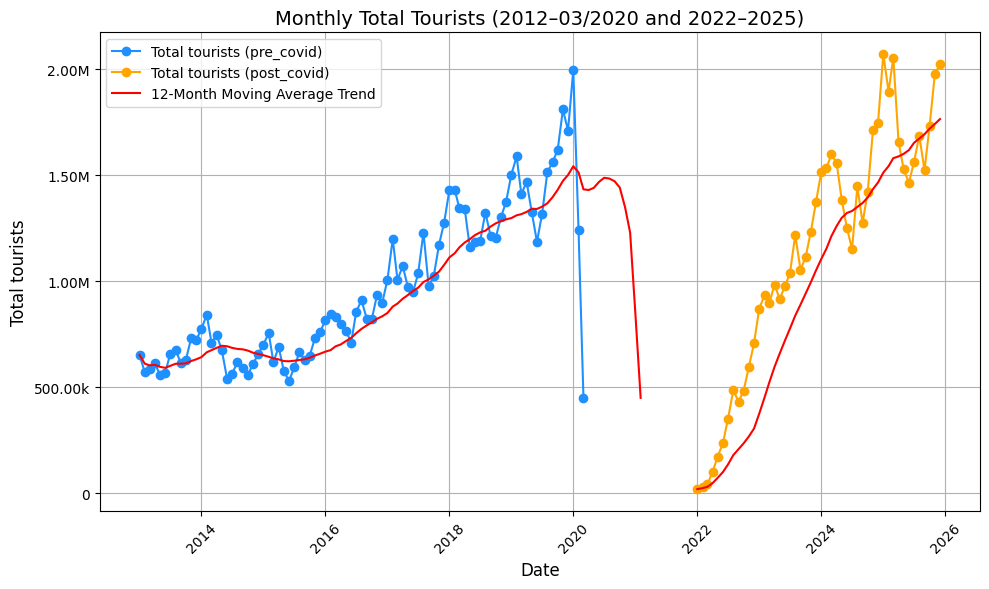

In [24]:
# Moving Average
window_size = 12
df['smoothing'] = df['total'].rolling(window=window_size, min_periods=1).mean()

# Split data into pre_covid and post_covid
pre_covid = df[df['date'] < '2022-01-01']
post_covid = df[df['date'] >= '2022-01-01']


plt.figure(figsize=(10, 6))

# Plot pre_covid
plt.plot(pre_covid['date'], pre_covid['total'], marker='o', color='dodgerblue', label='Total tourists (pre_covid)')
# Plot post_covid
plt.plot(post_covid['date'], post_covid['total'], marker='o', color='orange', label='Total tourists (post_covid)')
# Moving average line
plt.plot(df['date'], df['smoothing'], color='red', label=f'{window_size}-Month Moving Average Trend')

plt.title('Monthly Total Tourists (2012–03/2020 and 2022–2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total tourists', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(num_to_str))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


# **3.Inferential statistics**

## **3.1.Compare the Average Number of Tourists Before and After Covid (Pre_Covid vs Post_Covid).**

### **Hypotheses**

- **Null Hypothesis (H₀):**  
  The average number of customers before Covid is **equal to** the average number of customers after Covid.  
  $\mu_{\text{pre_covid}} = \mu_{\text{post_covid}}$

- **Alternative Hypothesis (H₁):**  
  There **is a difference** in the average number of customers before and after Covid.  
  $\mu_{\text{pre_covid}} \ne \mu_{\text{post_covid}}$

### **Statistical Method**

- **Test Used:** Independent **t-test**
- **Groups Compared:**  
  - `pre_covid`: Tourists before Covid  
  - `post_covid`: Tourists after Covid

- **Performed Separately for Each Route Type:**
  - **Cruise**
  - **Road**
  - **Aviation**

### **Significance Level**

- **α (alpha) = 0.05**

> If the p-value < 0.05, we **reject the null hypothesis** and conclude that there is a **statistically significant difference** in the average number of tourists before and after Covid.


In [25]:
from scipy.stats import ttest_ind

def compare_means_and_ttest(column):
    pre_mean = df_pre_covid[column].mean()
    post_mean = df_post_covid[column].mean()

    # Independent t-test
    stat, p_value = ttest_ind(df_pre_covid[column], df_post_covid[column], equal_var=False)

    change = post_mean - pre_mean

    return {
        'variable': column,
        'pre_covid_mean': pre_mean,
        'post_covid_mean': post_mean,
        'change': change,
        't_statistic': stat,
        'p_value': p_value,
        'increase_decrease': "Increase" if change > 0 else "Decrease"
    }


results = pd.DataFrame([compare_means_and_ttest(col) for col in ['cruise', 'road', 'aviation']])
display(results)

,variable,pre_covid_mean,post_covid_mean,change,t_statistic,p_value,increase_decrease
0,cruise,15790.392857,13567.145833,-2223.247024,0.807791,0.421570,Decrease
1,road,165502.142857,155257.562500,-10244.580357,0.676862,0.500554,Decrease
2,aviation,768811.000000,977332.541667,208521.541667,-2.716176,0.008471,Increase


### **Summary**

- **Road** experienced the most substantial decline post-Covid, with a **statistically significant difference** observed.
- **Cruise** showed **no statistically significant change** before and after Covid.
- **Aviation** increased post-Covid, but the difference is **not statistically significant**.


## **3.2.Test the Proportion of Tourists by mode of transport (Cruise, Road, Aviation)**

### **Hypotheses**

- **Null Hypothesis (H₀):**  
  The proportion of tourists by mode of transport **does not change** before and after Covid.

- **Alternative Hypothesis (H₁):**  
  There **is a change** in the proportion of tourists by mode of transport before and after Covid.

### **Statistical Method**

- **Test Used:** Chi-square test for proportions (Chi-square test of independence)
- **Variables:**
  - **Categorical variable 1:** Time period (`pre_covid` vs `post_covid`)
  - **Categorical variable 2:** Mode of transport (`cruise`, `road`, `aviation`)

### **Significance Level**

- **α (alpha) = 0.05**

> If the p-value < 0.05, we **reject the null hypothesis**, indicating a **statistically significant change** in the distribution of tourists across mode of transport before and after Covid.


In [26]:
# Proportion of tourists by mode of transport (cruise, road, aviation)
df['cruise_ratio'] = df['cruise'] / df['total'] * 100
df['road_ratio'] = df['road'] / df['total'] * 100
df['aviation_ratio'] = df['aviation'] / df['total'] * 100

# Average rate by mode of transport
total_ratios = {
'cruise': df['cruise_ratio'].mean(),
'road': df['road_ratio'].mean(),
'aviation': df['aviation_ratio'].mean()
}

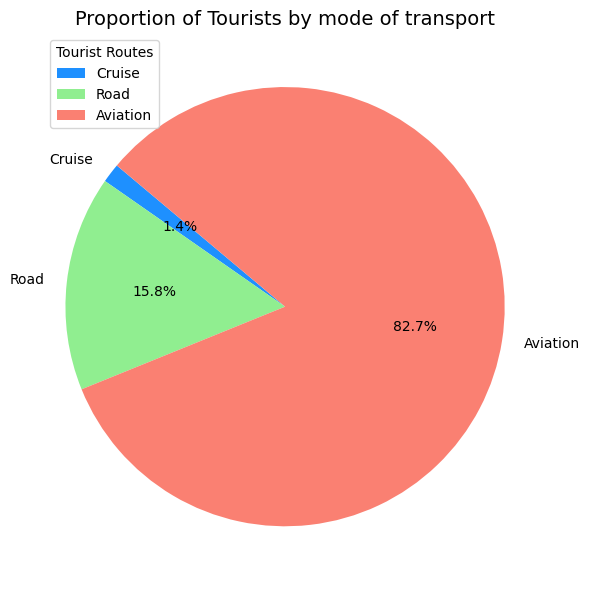

In [27]:
# Tourists density by mode of transport (cruise, road, aviation)
labels = ['Cruise', 'Road', 'Aviation']
color = ['dodgerblue', 'lightgreen', 'salmon']
sizes = [total_ratios['cruise'], total_ratios['road'], total_ratios['aviation']]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=color, startangle=140)
plt.title('Proportion of Tourists by mode of transport', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.legend(labels, title="Tourist Routes", loc="upper left", fontsize=10)
plt.show()

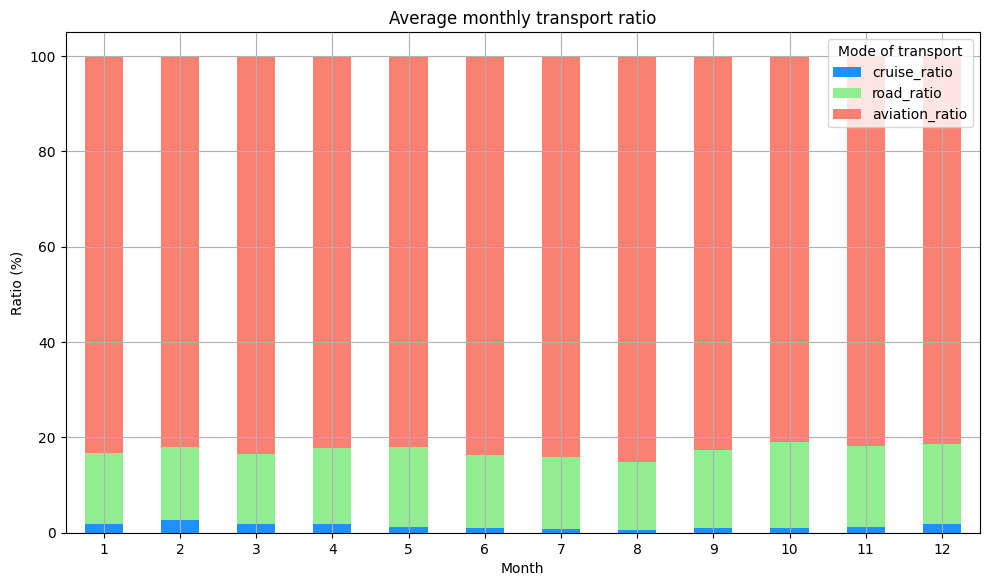

In [28]:
# Group by month
month_avg_ratio = df.groupby('month')[['cruise_ratio', 'road_ratio', 'aviation_ratio']].mean()

# Plot stacked bar chart by month
month_avg_ratio.plot(kind='bar', stacked=True, figsize=(10, 6), color=['dodgerblue', 'lightgreen', 'salmon'])

plt.title('Average monthly transport ratio')
plt.ylabel('Ratio (%)')
plt.xlabel('Month')
plt.legend(title='Mode of transport')
plt.tight_layout()
plt.grid()
plt.xticks(rotation=0)
plt.show()

In [29]:
from scipy.stats import chi2_contingency

contingency_table = pd.DataFrame({
    'pre_covid': df_pre_covid[['cruise', 'road', 'aviation']].sum(),
    'post_covid': df_post_covid[['cruise', 'road', 'aviation']].sum()
})

# The ratio for each mode of transport in each period
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

print("\nTourists frequency table by mode of transport (absolute counts):")
display(contingency_table)

print("\nTourists frequency table by mode of transport (percentages):")
display(contingency_table_percentage)

# Chi-square test for proportions
chi2, p, dof, expected = chi2_contingency(contingency_table.T)

print(f"\nChi-square test: chi2 = {chi2:.4f}, p-value = {p:.4f}")

if p < 0.05:
    print("There is a change in the proportion of tourists by mode of transport before and after Covid (reject H0).")
else:
    print("There is not enough evidence to reject H0, the proportion of tourists does not change.")


Tourists frequency table by mode of transport (absolute counts):


,pre_covid,post_covid
cruise,1326393.0,651223.0
road,13902180.0,7452363.0
aviation,64580124.0,46911962.0



Tourists frequency table by mode of transport (percentages):


,pre_covid,post_covid
cruise,1.661965,1.183707
road,17.419380,13.545922
aviation,80.918655,85.270371



Chi-square test: chi2 = 433852.8365, p-value = 0.0000
There is a change in the proportion of tourists by mode of transport before and after Covid (reject H0).


### **Summary**
- The proportion of mode of transport has changed with aviation increasing and accounting for a large proportion.

# **4.Forecast**

Forecasting Model for 2026 Using SARIMAX and Exponential Smoothing

In this project, We will develop a forecasting model to predict data for the year **2026**. The models to be employed are:


1. **SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)**

- SARIMAX will be used to model and forecast the time series data, capturing:
  - **Seasonality**
  - **Trend**
  - **Autoregressive behavior**
  - Influence of any **exogenous variables** if available

- This model is an extension of ARIMA and is suitable for data with seasonal patterns and external regressors.


2. **Exponential Smoothing (ETS – Error, Trend, Seasonal)**

- Exponential Smoothing relies on weighted averages of past observations to forecast future values.
- It captures components such as:
  - **Level**
  - **Long-term Trend**
  - **Seasonality**

- ETS is well-suited for time series with stable trends and seasonal patterns.

**Workflow**

1. Data preprocessing and visualization  
2. Model fitting and parameter tuning  
3. Forecast evaluation using metrics like MAE, RMSE  
4. Forecasting for 2026 and comparison of results

**Goal**

Compare SARIMAX and ETS to find the best model for accurate and reliable 2025 forecasts.


## 4.1.Analyze the data

Remember that we do not have a complete 12-month dataset for 2020 and there is no data available for 2021. However, to build a reliable forecasting model, sufficient and comprehensive data is required for accurate predictions.

To address this, we apply proportional allocation to estimate the missing values for the affected period (2020–2021), using patterns observed in both earlier and later periods of the COVID-19 timeline. This ensures a complete dataset for model training and accurate forecasting


First, we will analyze the data to determine the most appropriate method for imputing the missing values.


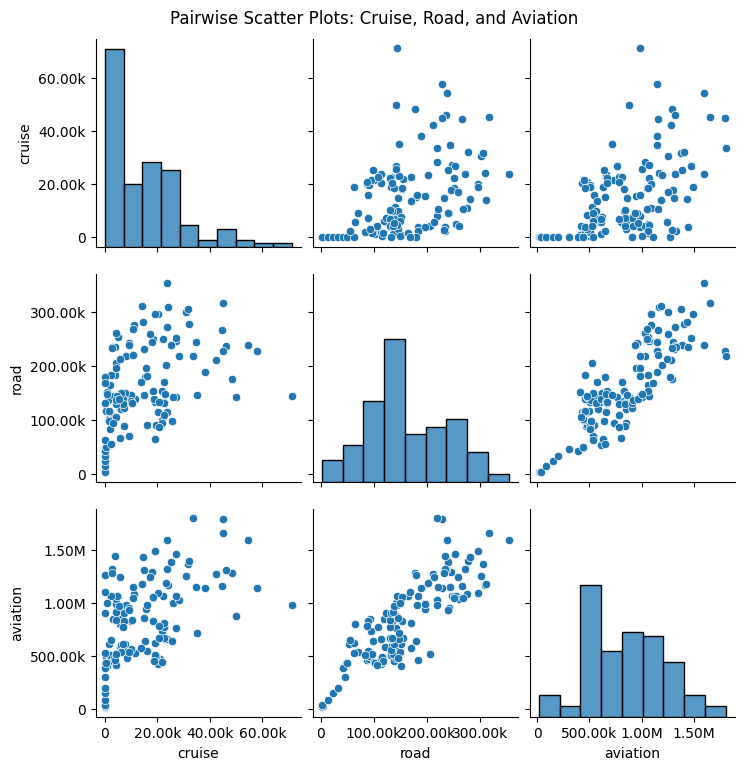

In [30]:
cols = ['cruise', 'road', 'aviation']

g = sns.pairplot(df_filtered[cols])

plt.suptitle('Pairwise Scatter Plots: Cruise, Road, and Aviation', y=1.02)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(num_to_str))
    ax.xaxis.set_major_formatter(FuncFormatter(num_to_str))

plt.show()

,cruise,road,aviation
cruise,1.000000,0.429865,0.51193
road,0.429865,1.000000,0.83036
aviation,0.511930,0.830360,1.00000


<Axes: >

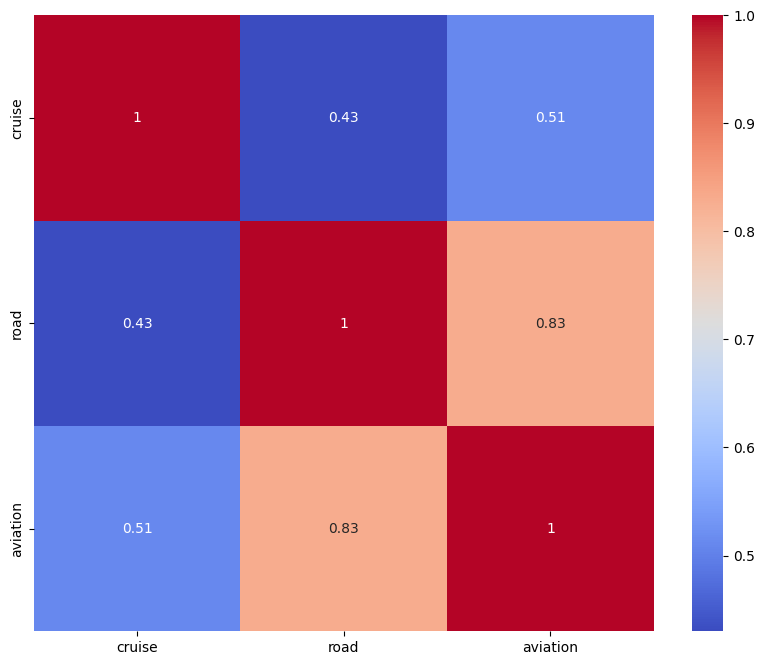

In [31]:
display(df_filtered[cols].corr())
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_filtered[cols].corr(),annot=True, cmap='coolwarm')

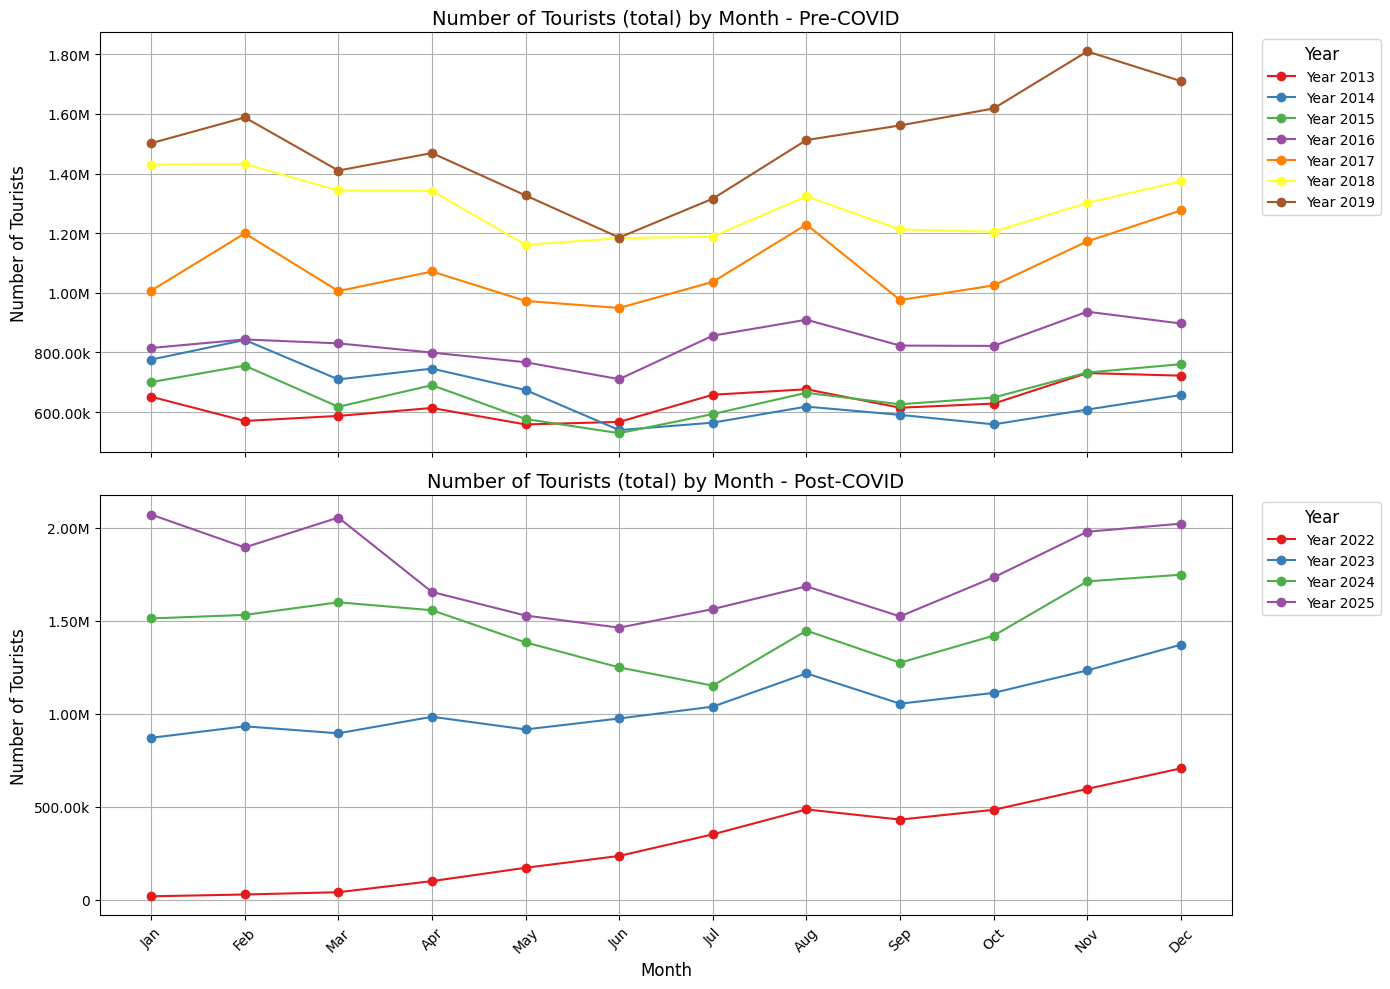

In [32]:
colors = sns.color_palette("Set1", n_colors=len(df_pre_covid['year'].unique()))

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Pre COVID
for idx, year in enumerate(df_pre_covid['year'].unique()):
    yearly_data = df_pre_covid[df_pre_covid['year'] == year]
    axes[0].plot(yearly_data['date'].dt.strftime('%b'), yearly_data['total'],
                 label=f'Year {year}', marker='o', color=colors[idx])

axes[0].set_title("Number of Tourists (total) by Month - Pre-COVID", fontsize=14)
axes[0].set_ylabel("Number of Tourists", fontsize=12)
axes[0].yaxis.set_major_formatter(FuncFormatter(num_to_str))
axes[0].legend(title="Year", loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10, title_fontsize=12)
axes[0].grid(True)

# Post COVID
for idx, year in enumerate(df_post_covid['year'].unique()):
    yearly_data = df_post_covid[df_post_covid['year'] == year]
    axes[1].plot(yearly_data['date'].dt.strftime('%b'), yearly_data['total'],
                 label=f'Year {year}', marker='o', color=colors[idx])

axes[1].set_title("Number of Tourists (total) by Month - Post-COVID", fontsize=14)
axes[1].set_xlabel("Month", fontsize=12)
axes[1].set_ylabel("Number of Tourists", fontsize=12)
axes[1].yaxis.set_major_formatter(FuncFormatter(num_to_str))
axes[1].legend(title="Year", loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10, title_fontsize=12)
axes[1].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations from the Chart

Based on the chart and the information above, here are a couple of key takeaways:

1. The data seems to follow a **linear trend**, showing a steady pattern over time.

2. Apart from 1-2 years with slight variations, most of the data shows **similar seasonal and cyclical patterns**. This means the behavior tends to repeat in a regular way each year.

These patterns are helpful for building reliable forecasting models.


## 4.2.Processing missing values

Allocation Ratios for 2020 and 2021

In this analysis, we assume the allocation ratios for **2020** and **2021** as follows:

- **2020** will have the same allocation ratios as the **pre-COVID** period.

- **2021** will have the average allocation ratios between the **pre-COVID** and **post-COVID** periods.

These assumptions help standardize the input data and provide a consistent basis for forecasting.


In [33]:
# Allocation ratios for 2020 and 2021
ratios_2020 =  {'cruise': 0.0166, 'road': 0.1742, 'aviation': 0.8092}
ratios_2021 = {'cruise': 0.0139, 'road': 0.1521, 'aviation': 0.8340}

# Actual `total` values for missing months (based on GSO/NSO)
total_2020 = {
    '2020-04-01': 26221, '2020-05-01': 22700, '2020-06-01': 8800, '2020-07-01': 13900,
    '2020-08-01': 16300, '2020-09-01': 13800, '2020-10-01': 14800, '2020-11-01': 17700,
    '2020-12-01': 16300
}
total_2021 = {
    '2021-01-01': 17736, '2021-02-01': 11000, '2021-03-01': 19400, '2021-04-01': 19500,
    '2021-05-01': 13400, '2021-06-01': 7200, '2021-07-01': 7500, '2021-08-01': 9300,
    '2021-09-01': 9500, '2021-10-01': 10600, '2021-11-01': 15000, '2021-12-01': 17200
}

def fill_missing_values(df, year, total_values, ratios):
    for date, total_val in total_values.items():
        date = pd.to_datetime(date)
        # Find the row index to fill
        mask = df['date'] == date
        if mask.any():
            # Fill the `total` column
            df.loc[mask, 'total'] = total_val
            # Calculate and fill values for cruise, road, aviation
            df.loc[mask, 'cruise'] = np.round(total_val * ratios['cruise'])
            df.loc[mask, 'road'] = np.round(total_val * ratios['road'])
            df.loc[mask, 'aviation'] = np.round(total_val * ratios['aviation'])

# Fill data for 2020 and 2021
fill_missing_values(df, 2020, total_2020, ratios_2020)
fill_missing_values(df, 2021, total_2021, ratios_2021)

print("Data for 2020 (April–December):")
display(df[df['date'].dt.year == 2020][['date', 'cruise', 'road', 'aviation', 'total']])
print("\nData for 2021:")
display(df[df['date'].dt.year == 2021][['date', 'cruise', 'road', 'aviation', 'total']])


Data for 2020 (April–December):


,date,cruise,road,aviation,total
84,2020-01-01,80092.0,292464.0,1621569.0,1994125.0
85,2020-02-01,54993.0,192859.0,994879.0,1242731.0
86,2020-03-01,9024.0,65762.0,375137.0,449923.0
87,2020-04-01,435.0,4568.0,21218.0,26221.0
88,2020-05-01,377.0,3954.0,18369.0,22700.0
89,2020-06-01,146.0,1533.0,7121.0,8800.0
90,2020-07-01,231.0,2421.0,11248.0,13900.0
91,2020-08-01,271.0,2839.0,13190.0,16300.0
92,2020-09-01,229.0,2404.0,11167.0,13800.0
93,2020-10-01,246.0,2578.0,11976.0,14800.0



Data for 2021:


,date,cruise,road,aviation,total
96,2021-01-01,247.0,2698.0,14792.0,17736.0
97,2021-02-01,153.0,1673.0,9174.0,11000.0
98,2021-03-01,270.0,2951.0,16180.0,19400.0
99,2021-04-01,271.0,2966.0,16263.0,19500.0
100,2021-05-01,186.0,2038.0,11176.0,13400.0
101,2021-06-01,100.0,1095.0,6005.0,7200.0
102,2021-07-01,104.0,1141.0,6255.0,7500.0
103,2021-08-01,129.0,1415.0,7756.0,9300.0
104,2021-09-01,132.0,1445.0,7923.0,9500.0
105,2021-10-01,147.0,1612.0,8840.0,10600.0


In [34]:
df_full = df.copy()

## 4.3.Analyze the full data

In [35]:
df_full.set_index('date', inplace=True)

df_full = df_full.asfreq('MS')

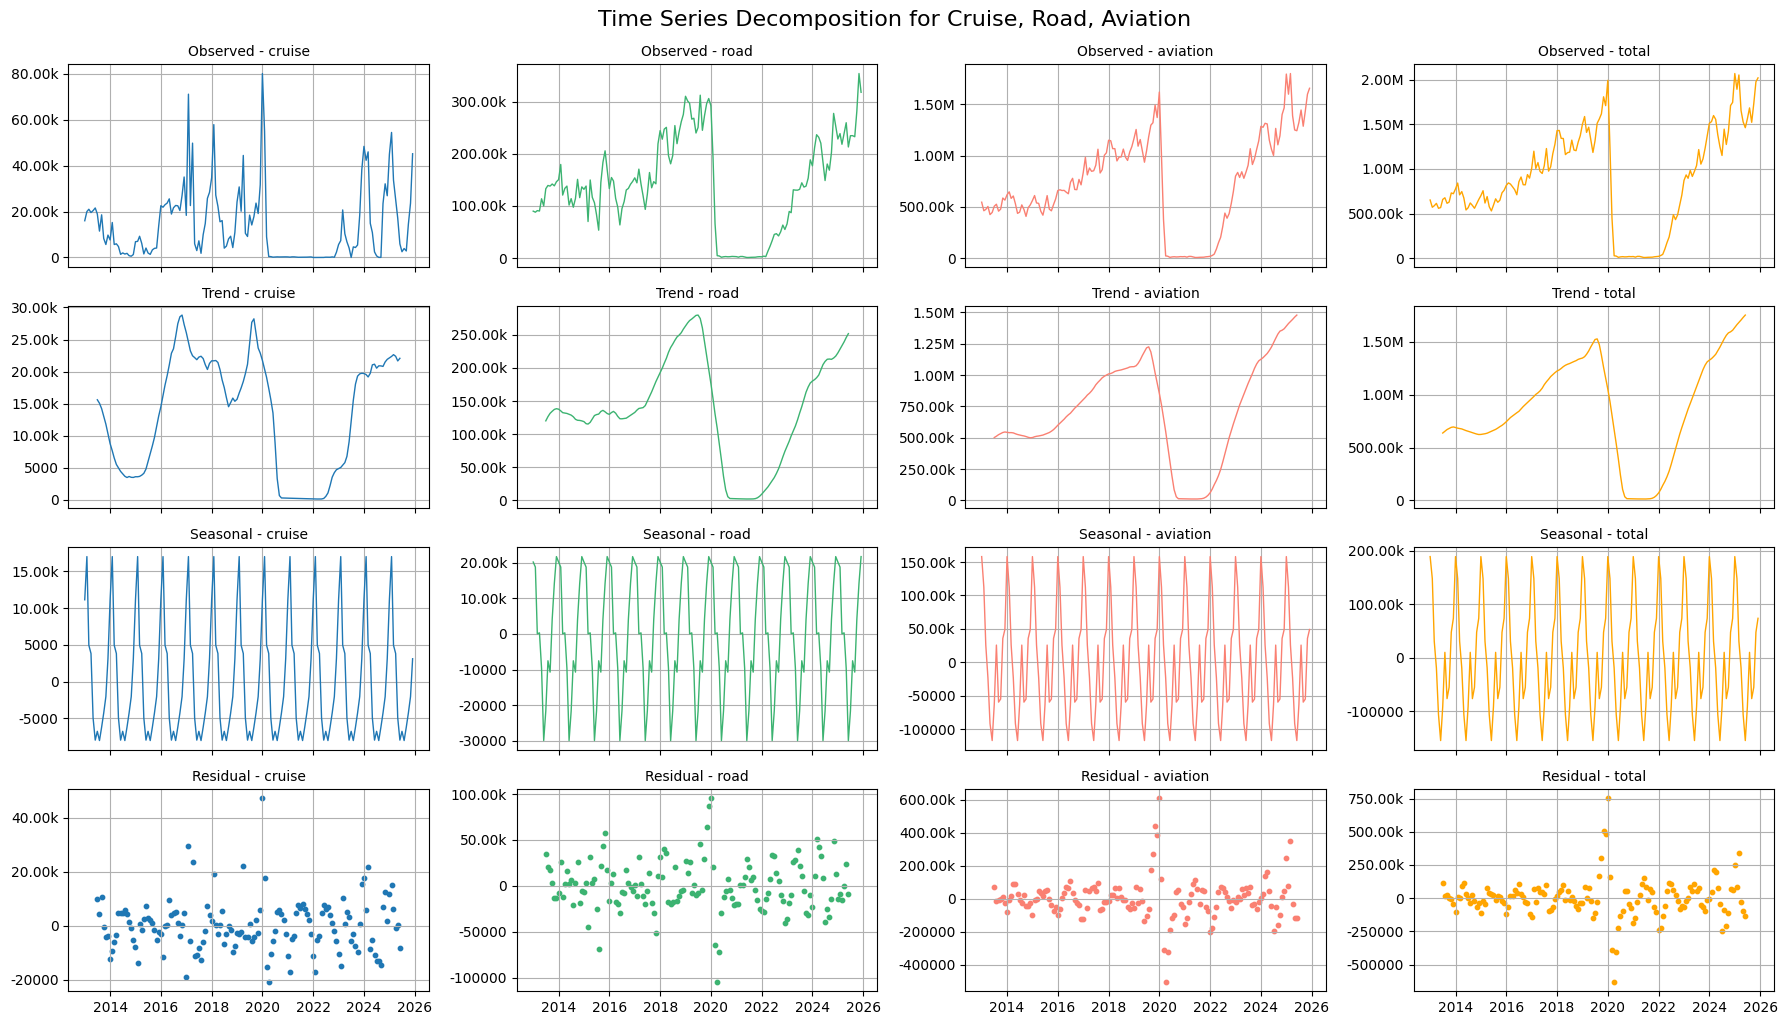

In [36]:
def plot_combined_decompositions(df, cols, colors, use_y_formatter=False):
    fig, axes = plt.subplots(nrows=4, ncols=len(cols), figsize=(18, 10), sharex='col')

    for i, col in enumerate(cols):
        result = seasonal_decompose(df[col], model='additive', period=12)

        components = {
            'Observed': result.observed,
            'Trend': result.trend,
            'Seasonal': result.seasonal,
            'Residual': result.resid
        }

        col_color = colors[i]

        for j, (comp_name, comp_data) in enumerate(components.items()):
            ax = axes[j, i]

            if comp_name == 'Residual':
                ax.scatter(comp_data.index, comp_data, color=col_color, s=10)
            elif comp_name == 'Observed':
                ax.plot(comp_data.index, comp_data, label=comp_name, color=col_color, linewidth=1)
            else:
                ax.plot(comp_data.index, comp_data, label=comp_name, color=col_color, linewidth=1)

            ax.set_title(f'{comp_name} - {col}', fontsize=10)
            ax.grid(True)

            # Format for Y
            if use_y_formatter:
                ax.yaxis.set_major_formatter(FuncFormatter(num_to_str))


    plt.tight_layout()
    plt.suptitle('Time Series Decomposition for Cruise, Road, Aviation', fontsize=16, y=1.02)
    plt.show()


cols = ['cruise', 'road', 'aviation','total']
colors = ['#1f77b4', '#3CB371', 'salmon','orange']

plot_combined_decompositions(
    df_full,
    cols,
    colors,
    use_y_formatter=True
)

## 4.4.Stationarity check and time series preprocessing

I will use the **SARIMAX** model for time series forecasting. SARIMAX requires the input data to be **stationary**—meaning its statistical properties (mean, variance) do not change over time. If the data is not stationary, we will apply transformations such as **differencing** to make it suitable for SARIMAX modeling.



===== cruise =====
ADF Statistic: -1.7582
p-value: 0.4014
Non-stationary


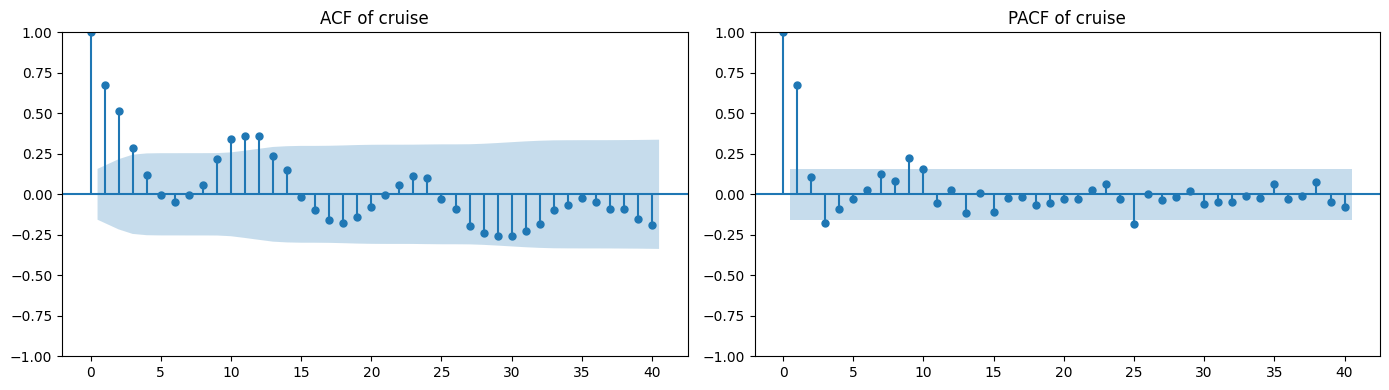


===== road =====
ADF Statistic: -2.4252
p-value: 0.1347
Non-stationary


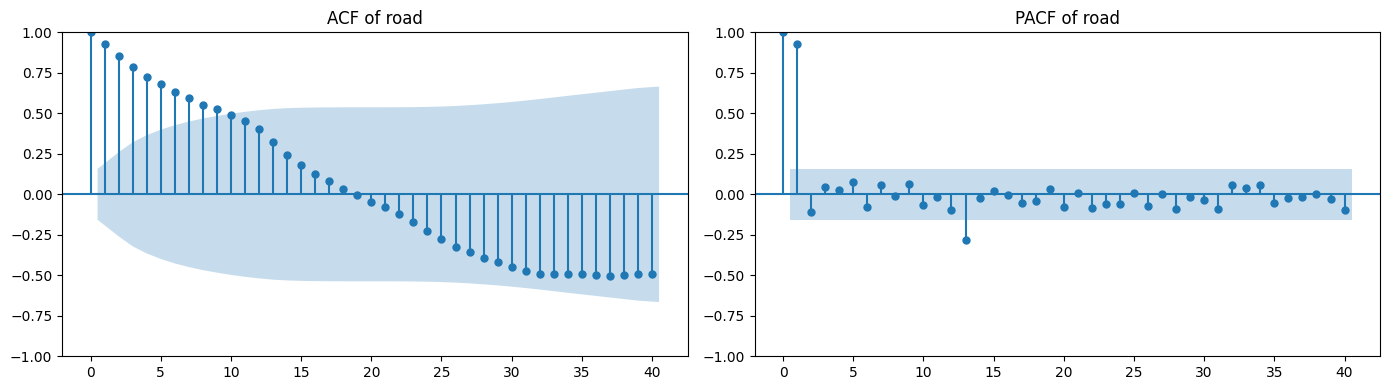


===== aviation =====
ADF Statistic: -2.2077
p-value: 0.2035
Non-stationary


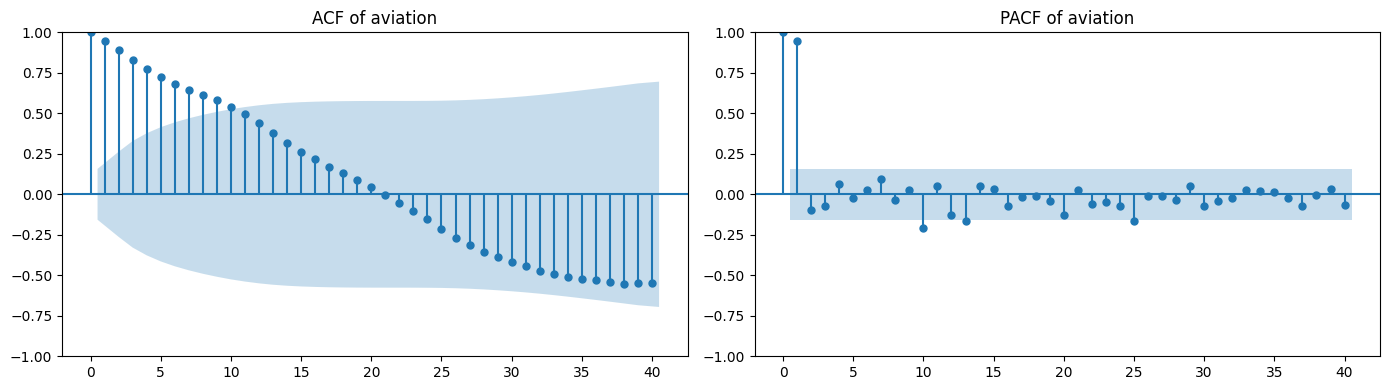


===== total =====
ADF Statistic: -1.8340
p-value: 0.3637
Non-stationary


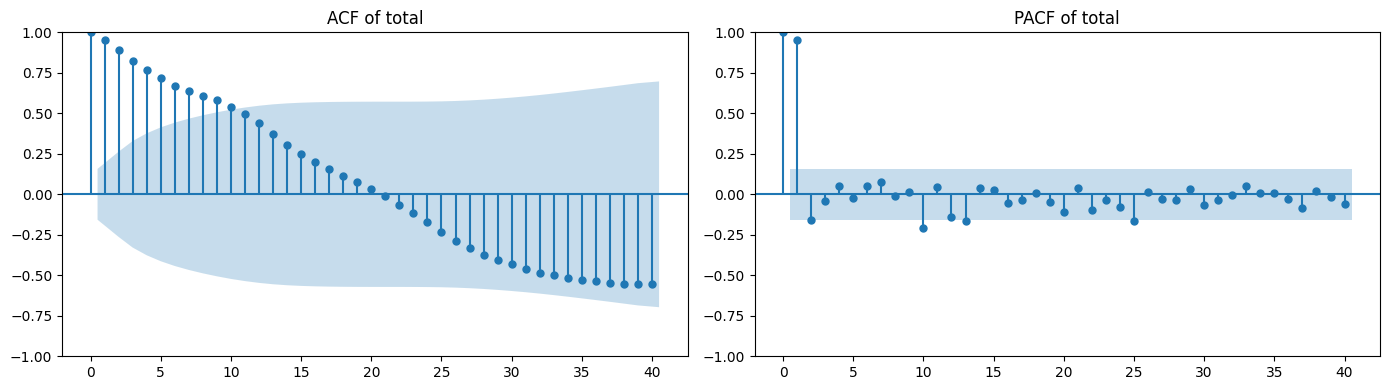

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

cols = ['cruise', 'road', 'aviation', 'total']

for col in cols:
    print(f"\n===== {col} =====")

    # ADF Test
    result = adfuller(df_full[col].dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-stationary")

    # ACF & PACF plots df_full
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(df_full[col].dropna(), ax=axes[0], lags=40)
    plot_pacf(df_full[col].dropna(), ax=axes[1], lags=40, method='ywm')
    axes[0].set_title(f'ACF of {col}')
    axes[1].set_title(f'PACF of {col}')
    plt.tight_layout()
    plt.show()


In [38]:
cols= ['cruise','road','aviation','total']
df_log = np.log(df_full[cols])
df_logdiff = df_log.diff().dropna()
df_logdiff2 = df_logdiff.diff(12)
df_logdiff2 = df_logdiff2.dropna()


===== cruise =====
ADF Statistic: -5.4663
p-value: 0.0000
Stationary


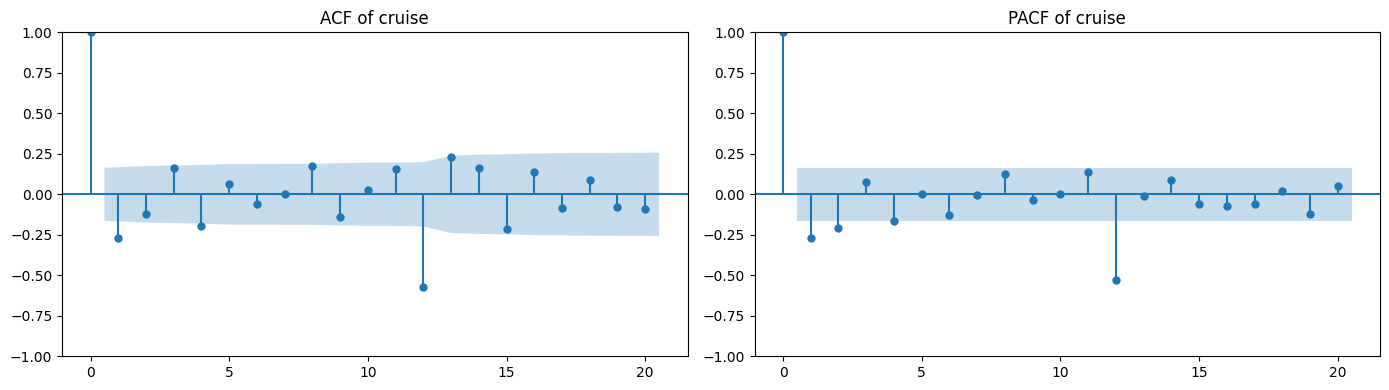


===== road =====
ADF Statistic: -3.2421
p-value: 0.0177
Stationary


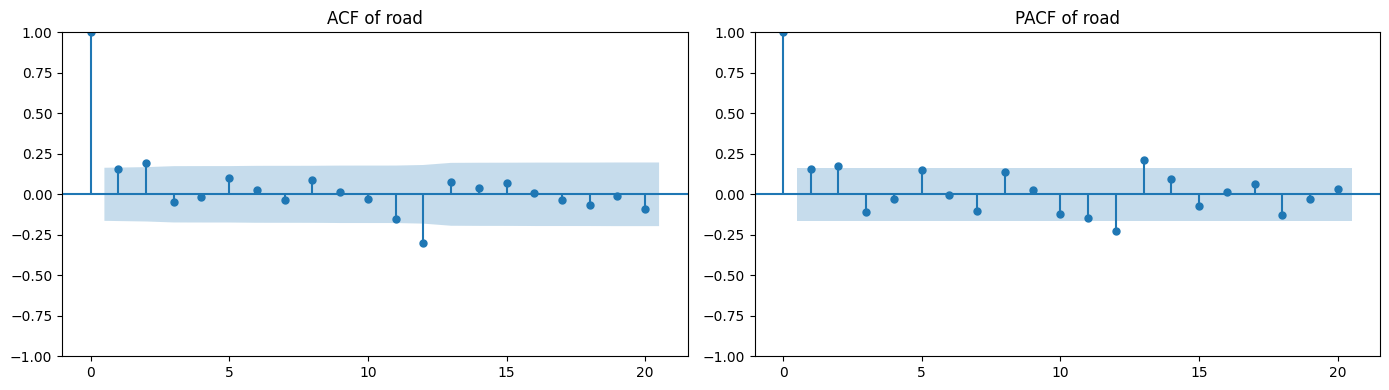


===== aviation =====
ADF Statistic: -3.0706
p-value: 0.0288
Stationary


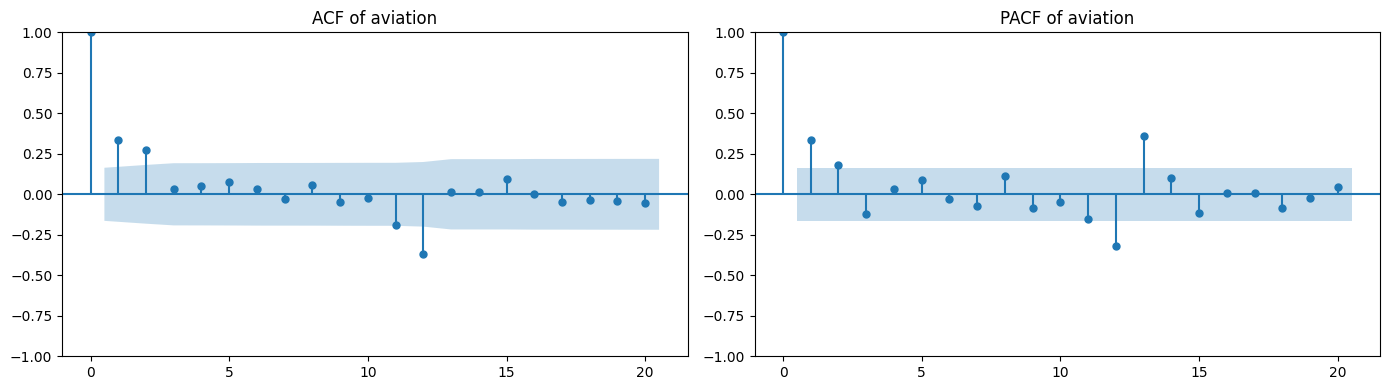


===== total =====
ADF Statistic: -3.0497
p-value: 0.0305
Stationary


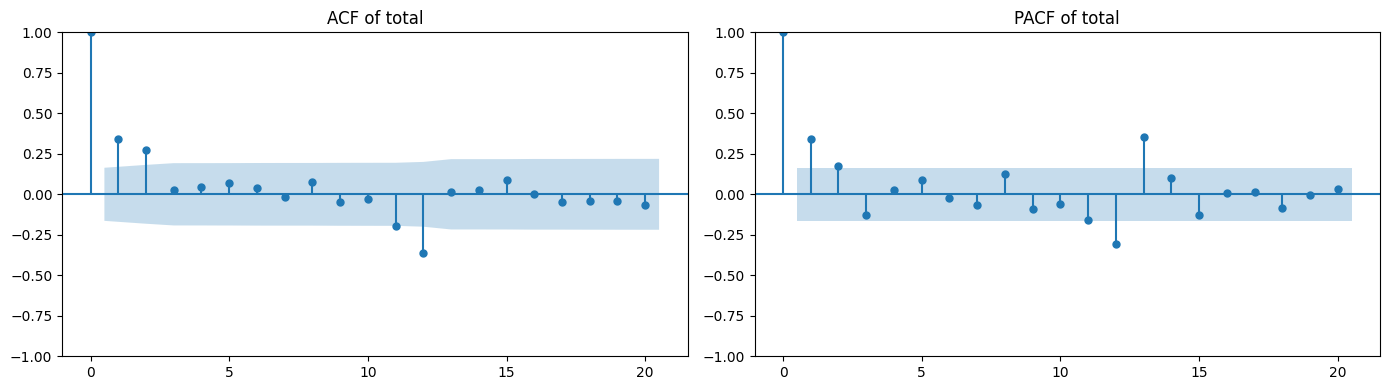

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

for col in cols:
    print(f"\n===== {col} =====")

    # ADF Test
    result = adfuller(df_logdiff2[col].dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-stationary")

    # ACF & PACF plots after applied log_then_difference for df_full
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(df_logdiff2[col].dropna(), ax=axes[0], lags=20)
    plot_pacf(df_logdiff2[col].dropna(), ax=axes[1], lags=20, method='ywm')
    axes[0].set_title(f'ACF of {col}')
    axes[1].set_title(f'PACF of {col}')
    plt.tight_layout()
    plt.show()


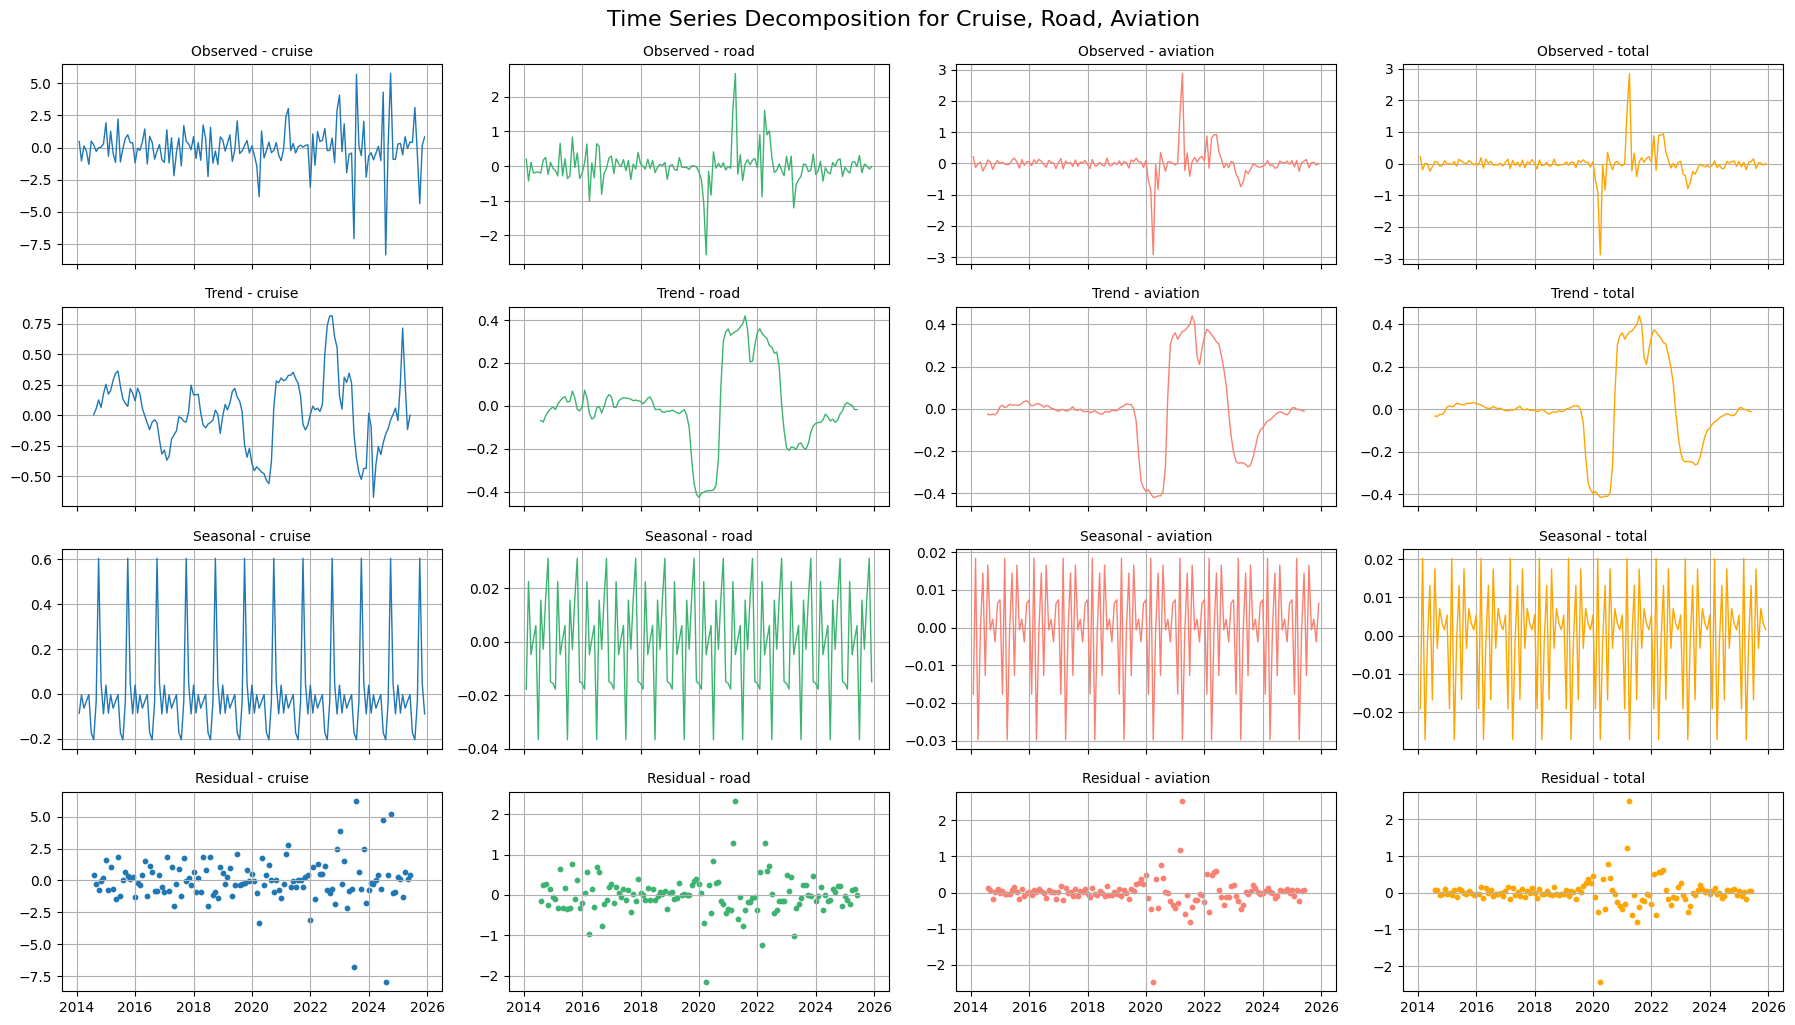

In [40]:
# plot combined decompositions after applied logarithm and differencing
plot_combined_decompositions(
    df_logdiff2,
    cols,
    colors
)

## 4.5.Exponential Smoothing model

Model Evaluation and Forecasting Techniques

1. **TimeSeriesSplit Cross-Validation**  
A cross-validation method that preserves the time order of data. It avoids data leakage by ensuring training data always comes before test data.

2. **Rolling Forecast**  
We simulate real-world forecasting by predicting one step at a time for the next 12 months, updating the model as new data becomes available.



In [41]:
# Use log-transform to handle skewed data
epsilon = 1e-6
y_log = np.log(df_full['total'] + epsilon)

# Create a dummy variable for the impact of COVID-19
exog = pd.DataFrame({
    'covid_affected': ((df_full.index >= '2020-03-01') & (df_full.index <= '2022-12-01')).astype(int)
}, index=df_full.index)

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit

# Time series cross-validation setup
tscv_hw = TimeSeriesSplit(n_splits=3, test_size=12)

mae_hw, rmse_hw, mape_hw = [], [], []

# Cross-validation loop
for fold, (train_idx, test_idx) in enumerate(tscv_hw.split(y_log)):
    train_hw = y_log.iloc[train_idx]
    test_hw = y_log.iloc[test_idx]

    model_hw = ExponentialSmoothing(
        train_hw,
        trend="additive",
        seasonal="additive",
        seasonal_periods=12
    ).fit(optimized=True)

    # Forecast on log scale
    forecast_log = model_hw.forecast(steps=len(test_hw))

    # Variance of residuals (log scale)
    sigma2 = model_hw.sse / len(train_hw)

    # Inverse transform with bias correction
    forecast_hw = np.exp(forecast_log + 0.5 * sigma2)
    actual_hw = np.exp(test_hw)

    # Evaluation
    mae_hw.append(mean_absolute_error(actual_hw, forecast_hw))
    rmse_hw.append(np.sqrt(mean_squared_error(actual_hw, forecast_hw)))

    # MAPE
    mape_hw.append(
        np.mean(np.abs(actual_hw - forecast_hw) / np.maximum(actual_hw, 1e-6)) * 100
    )

print("\n[ExponentialSmoothing] Average across all folds:")
print(f"MAE: {np.mean(mae_hw):.2f} ± {np.std(mae_hw):.2f}")
print(f"RMSE: {np.mean(rmse_hw):.2f} ± {np.std(rmse_hw):.2f}")
print(f"MAPE: {np.mean(mape_hw):.2f}% ± {np.std(mape_hw):.2f}%")


[ExponentialSmoothing] Average across all folds:
MAE: 433959.35 ± 458946.36
RMSE: 594915.57 ± 669658.24
MAPE: 35.60% ± 40.30%


In [43]:
# Rolling forecast (12 months)
forecast_horizon_hw = 12
step_hw = 1
current_y_hw = y_log.copy()

forecast_dates_hw = pd.date_range(
    start=current_y_hw.index[-1] + pd.DateOffset(months=1),
    periods=forecast_horizon_hw,
    freq='MS'
)

forecast_vals_hw, lower_hw, upper_hw = [], [], []

base_model_hw = ExponentialSmoothing(
    current_y_hw,
    trend='additive',
    seasonal='additive',
    seasonal_periods=12
).fit(optimized=True)

resid_std_hw = base_model_hw.resid.std()

for i in range(0, forecast_horizon_hw, step_hw):
    steps = min(step_hw, forecast_horizon_hw - i)

    model_hw = ExponentialSmoothing(
        current_y_hw,
        trend='additive',
        seasonal='additive',
        seasonal_periods=12
    ).fit(optimized=True)

    forecast_log_hw = model_hw.forecast(steps=steps)

    lower_log_hw = forecast_log_hw - 1.96 * resid_std_hw
    upper_log_hw = forecast_log_hw + 1.96 * resid_std_hw

    forecast_vals_hw.extend(np.round(np.exp(forecast_log_hw) - epsilon).astype(int))
    lower_hw.extend(np.round(np.exp(lower_log_hw) - epsilon).astype(int))
    upper_hw.extend(np.round(np.exp(upper_log_hw) - epsilon).astype(int))

    new_y_hw = pd.Series(forecast_log_hw.values, index=forecast_dates_hw[i:i+steps])
    current_y_hw = pd.concat([current_y_hw, new_y_hw])

forecast_df_hw = pd.DataFrame({
    'date': forecast_dates_hw,
    'forecast': forecast_vals_hw,
    'lower': lower_hw,
    'upper': upper_hw,
})

print("\nForecast for the next 12 months (Exponential Smoothing):")
display(forecast_df_hw)


Forecast for the next 12 months (Exponential Smoothing):


,date,forecast,lower,upper
0,2026-01-01,2261979,1298218,3941212
1,2026-02-01,2208399,1267466,3847855
2,2026-03-01,2079617,1193554,3623469
3,2026-04-01,1800773,1033517,3137618
4,2026-05-01,1660484,953001,2893182
5,2026-06-01,1438431,825559,2506283
6,2026-07-01,1626703,933614,2834324
7,2026-08-01,1872989,1074964,3263445
8,2026-09-01,1700336,975874,2962620
9,2026-10-01,1785094,1024519,3110299


## 4.6.SARIMAX model

In [44]:
# TimeSeriesSplit setup
tscv_sarimax = TimeSeriesSplit(n_splits=3, test_size=12)

# Lists to store evaluation metrics
mae_scores, rmse_scores, mape_scores = [], [], []

# Metric storage
mae_sarimax, rmse_sarimax, mape_sarimax = [], [], []

# Validation
aic_sarimax, bic_sarimax, aicc_sarimax = [], [], []


# Cross-validation loop
for fold, (train_idx, test_idx) in enumerate(tscv_sarimax.split(y_log)):
    train_y_sarimax = y_log.iloc[train_idx]
    test_y_sarimax = y_log.iloc[test_idx]

    exog_train_sarimax = exog.iloc[train_idx]
    exog_test_sarimax = exog.iloc[test_idx]

    model_sarimax = SARIMAX(
        train_y_sarimax,
        exog=exog_train_sarimax,
        order=(1, 1, 2),
        seasonal_order=(0, 1, 1, 12),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    results_sarimax = model_sarimax.fit(disp=False)

    # Save AIC & BIC
    aic = results_sarimax.aic
    bic = results_sarimax.bic

    forecast_sarimax = results_sarimax.get_forecast(steps=len(test_y_sarimax), exog=exog_test_sarimax)

    forecast_mean_sarimax = np.exp(forecast_sarimax.predicted_mean) - epsilon
    actual_sarimax = np.exp(test_y_sarimax) - epsilon

    mae_sarimax.append(mean_absolute_error(actual_sarimax, forecast_mean_sarimax))
    rmse_sarimax.append(np.sqrt(mean_squared_error(actual_sarimax, forecast_mean_sarimax)))
    mape_sarimax.append(np.mean(np.abs((actual_sarimax - forecast_mean_sarimax) / actual_sarimax)) * 100)

    k = results_sarimax.params.shape[0]  # số tham số
    n = train_y_sarimax.shape[0]         # số quan sát train

    aicc = aic + (2 * k * (k + 1)) / (n - k - 1)


    aic_sarimax.append(aic)
    bic_sarimax.append(bic)
    aicc_sarimax.append(aicc)


# Print evaluation
print("\n[SARIMAX] Average across all folds:")
print(f"Order: {model_sarimax.order}, Seasonal order: {model_sarimax.seasonal_order}")
print(f"MAE: {np.mean(mae_sarimax):.2f} ± {np.std(mae_sarimax):.2f}")
print(f"RMSE: {np.mean(rmse_sarimax):.2f} ± {np.std(rmse_sarimax):.2f}")
print(f"MAPE: {np.mean(mape_sarimax):.2f}% ± {np.std(mape_sarimax):.2f}%")
print("\n[SARIMAX] Information Criteria (Average across folds):")
print(f"AIC : {np.mean(aic_sarimax):.2f} ± {np.std(aic_sarimax):.2f}")
print(f"BIC : {np.mean(bic_sarimax):.2f} ± {np.std(bic_sarimax):.2f}")
print(f"AICc: {np.mean(aicc_sarimax):.2f} ± {np.std(aicc_sarimax):.2f}")



[SARIMAX] Average across all folds:
Order: (1, 1, 2), Seasonal order: (0, 1, 1, 12)
MAE: 212086.45 ± 121975.04
RMSE: 247747.27 ± 135765.71
MAPE: 18.20% ± 14.62%

[SARIMAX] Information Criteria (Average across folds):
AIC : 80.36 ± 2.87
BIC : 96.20 ± 2.33
AICc: 81.03 ± 2.92


In [45]:
forecast_horizon_sarimax = 12
step_sarimax = 1

current_y_sarimax = y_log.copy()
current_exog_sarimax = exog.copy()

forecast_dates_sarimax = pd.date_range(
    start=current_y_sarimax.index[-1] + pd.DateOffset(months=1),
    periods=forecast_horizon_sarimax,
    freq='MS'
)

forecast_vals_sarimax, lower_sarimax, upper_sarimax = [], [], []

for i in range(0, forecast_horizon_sarimax, step_sarimax):
    steps = min(step_sarimax, forecast_horizon_sarimax - i)

    exog_future_sarimax = pd.DataFrame({
        'covid_affected': [0] * steps
    }, index=forecast_dates_sarimax[i:i+steps])

    model_sarimax = SARIMAX(
        current_y_sarimax,
        exog=current_exog_sarimax,
        order=(1, 1, 2),
        seasonal_order=(0, 1, 1, 12),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    results_sarimax = model_sarimax.fit(disp=False)

    forecast_sarimax = results_sarimax.get_forecast(steps=steps, exog=exog_future_sarimax)

    # confidence interval
    forecast_log_sarimax = forecast_sarimax.predicted_mean
    conf_int_log_sarimax = forecast_sarimax.conf_int(alpha=0.2)

    forecast_vals_sarimax.extend(np.round(np.exp(forecast_log_sarimax) - epsilon).astype(int))
    lower_sarimax.extend(np.round(np.exp(conf_int_log_sarimax.iloc[:, 0]) - epsilon).astype(int))
    upper_sarimax.extend(np.round(np.exp(conf_int_log_sarimax.iloc[:, 1]) - epsilon).astype(int))

    new_y_sarimax = pd.Series(forecast_log_sarimax.values, index=exog_future_sarimax.index)
    current_y_sarimax = pd.concat([current_y_sarimax, new_y_sarimax])
    current_exog_sarimax = pd.concat([current_exog_sarimax, exog_future_sarimax])

forecast_df_sarimax = pd.DataFrame({
    'date': forecast_dates_sarimax,
    'forecast': forecast_vals_sarimax,
    'lower': lower_sarimax,
    'upper': upper_sarimax,
})

print("\nForecast for the next 12 months (SARIMAX):")
display(forecast_df_sarimax)


Forecast for the next 12 months (SARIMAX):


,date,forecast,lower,upper
0,2026-01-01,2093322,1442313,3038174
1,2026-02-01,2081976,1436942,3016564
2,2026-03-01,2015421,1393086,2915773
3,2026-04-01,1752065,1213323,2530019
4,2026-05-01,1620408,1123948,2336161
5,2026-06-01,1408030,977992,2027162
6,2026-07-01,1596898,1110765,2295790
7,2026-08-01,1843719,1284184,2647050
8,2026-09-01,1678122,1170410,2406074
9,2026-10-01,1766117,1233417,2528884


**Model Selection: SARIMAX**

The **SARIMAX** model with parameters **order = (1, 1, 2) and seasonal_order = (0, 1, 1, 12)** achieved the lowest AIC and BIC values among the various SARIMAX parameter configurations tested. In addition, this model produced better MAE, RMSE, and MAPE values compared to the **Exponential Smoothing model**.

Therefore, I chose the **SARIMAX Model** as the final forecasting model.


### 4.6.2.Forecast for cruise, road and aviation

We will assume the ratios for each component in 2026 are the average of the ratios between 2023 and 2025.

- The average ratio balances out the fluctuations between 2023 and 2025.


In [68]:
# Filter data for the years 2023 and 2025
df_23_25 = df_full[df_full['year'].isin([2023, 2025])]

# Calculate the average for each column by month (grouped for both years)
monthly_mean = df_23_25.groupby('month')[['cruise', 'road', 'aviation', 'total']].mean()

# Calculate the ratio based on 'total' for each month
monthly_ratio_df = monthly_mean[['cruise', 'road', 'aviation']].div(monthly_mean['total'], axis=0)

display(monthly_ratio_df)


,cruise,road,aviation
month,,,
1,0.017188,0.099899,0.882913
2,0.021863,0.116105,0.862032
3,0.018433,0.103514,0.878053
4,0.013504,0.140333,0.846162
5,0.009795,0.159567,0.830638
6,0.004135,0.140858,0.855007
7,0.000974,0.140928,0.858098
8,0.002939,0.130659,0.866402
9,0.002792,0.143129,0.854079


In [69]:
forecast_df_sarimax['date'] = pd.to_datetime(forecast_df_sarimax['date'])

forecast_df_sarimax['month'] = forecast_df_sarimax['date'].dt.month

# Merge the forecast with monthly ratios based on 'month'
forecast_df_full = forecast_df_sarimax.merge(monthly_ratio_df, left_on='month', right_index=True)

# forecast cruise, road, and aviation values based on the forecast (total)
forecast_df_full['cruise'] = round(forecast_df_full['forecast'] * forecast_df_full['cruise'])
forecast_df_full['road'] = round(forecast_df_full['forecast'] * forecast_df_full['road'])
forecast_df_full['aviation'] = round(forecast_df_full['forecast'] * forecast_df_full['aviation'])
forecast_df_full['total'] = forecast_df_full['forecast']


forecast_df_full = forecast_df_full[['date', 'cruise', 'road', 'aviation', 'total']]
display(forecast_df_full)


,date,cruise,road,aviation,total
0,2026-01-01,35980.0,209122.0,1848221.0,2093322
1,2026-02-01,45519.0,241728.0,1794729.0,2081976
2,2026-03-01,37150.0,208624.0,1769647.0,2015421
3,2026-04-01,23661.0,245873.0,1482531.0,1752065
4,2026-05-01,15872.0,258564.0,1345973.0,1620408
5,2026-06-01,5822.0,198332.0,1203876.0,1408030
6,2026-07-01,1556.0,225048.0,1370295.0,1596898
7,2026-08-01,5418.0,240899.0,1597402.0,1843719
8,2026-09-01,4685.0,240188.0,1433248.0,1678122
9,2026-10-01,12352.0,260548.0,1493216.0,1766117


In [70]:
df_full_selected = df_full.reset_index()[['date', 'cruise', 'road', 'aviation', 'total']]

combined_df = pd.concat([df_full_selected, forecast_df_full], ignore_index=True)

combined_df = combined_df.sort_values(by='date').reset_index(drop=True)

display(combined_df)

,date,cruise,road,aviation,total
0,2013-01-01,16000.0,90000.0,545812.0,651812.0
1,2013-02-01,20000.0,88000.0,462476.0,570476.0
2,2013-03-01,21000.0,91000.0,475366.0,587366.0
3,2013-04-01,19571.0,90211.0,504137.0,613919.0
4,2013-05-01,20403.0,113746.0,424602.0,558751.0
...,...,...,...,...,...
163,2026-08-01,5418.0,240899.0,1597402.0,1843719.0
164,2026-09-01,4685.0,240188.0,1433248.0,1678122.0
165,2026-10-01,12352.0,260548.0,1493216.0,1766117.0
166,2026-11-01,26926.0,324686.0,1703247.0,2054859.0


In [71]:
combined_df = add_date_parts(combined_df, 'date')
combined_df['period'] = combined_df['date'].apply(classify_period)

In [72]:
hypothetical_start = pd.to_datetime('2020-04-01')
hypothetical_end = pd.to_datetime('2021-12-01')

forecast_start = pd.to_datetime('2026-01-01')
forecast_end = pd.to_datetime('2026-12-31')

# Create 'data_status' column based on timestamps
def classify_data_status(date):
    if hypothetical_start <= date <= hypothetical_end:
        return 'hypothetical'
    elif forecast_start <= date <= forecast_end:
        return 'forecast'
    else:
        return 'actual'


combined_df['data_status'] = combined_df['date'].apply(classify_data_status)

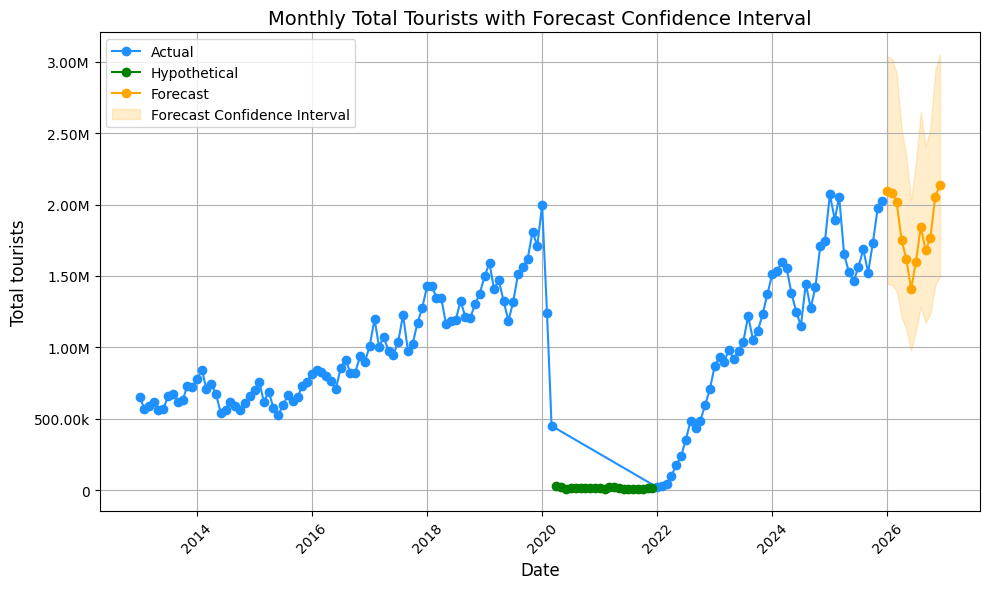

In [73]:
actual_df = combined_df[combined_df['data_status'] == 'actual']
hypothetical_df = combined_df[combined_df['data_status'] == 'hypothetical']
forecast_df = combined_df[combined_df['data_status'] == 'forecast']

plt.figure(figsize=(10, 6))

# actual and hypothetical
plt.plot(actual_df['date'], actual_df['total'], marker='o', color='dodgerblue', label='Actual')
plt.plot(hypothetical_df['date'], hypothetical_df['total'], marker='o', color='green', label='Hypothetical')

# forecast
plt.plot(forecast_df['date'], forecast_df['total'], marker='o', color='orange', label='Forecast')


plt.fill_between(
    forecast_df_sarimax['date'],
    forecast_df_sarimax['lower'],
    forecast_df_sarimax['upper'],
    color='orange',
    alpha=0.2,
    label='Forecast Confidence Interval'
)

plt.title('Monthly Total Tourists with Forecast Confidence Interval', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total tourists', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(num_to_str))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

In [74]:
yearly_totals = combined_df.groupby('year')[['cruise', 'road', 'aviation', 'total']].sum()

if 2025 in yearly_totals.index and 2026 in yearly_totals.index:
    change_2026_vs_2025 = ((yearly_totals.loc[2026] - yearly_totals.loc[2025]) / yearly_totals.loc[2025]) * 100
    print("Estimated change in 2026 compared to 2025 (%):")
    display(change_2026_vs_2025)
else:
    print("Data for 2025 or 2026 is not fully available in combined_df.")


Estimated change in 2026 compared to 2025 (%):


,0
cruise,-2.358485
road,-2.656470
aviation,5.427429
total,4.160400


# Conclusion

- **General Trend**: Tourist arrivals in Vietnam have steadily risen over the years, except during 2020 and 2021 when the COVID-19 pandemic significantly disrupted international travel.

- **By Quarter**: The fourth quarter consistently records the highest number of tourist arrivals each year, while the second quarter sees the lowest.

- **By Month**:
  - October, November, and December all record above-average tourist numbers, with December being the peak month of the year.
  - In contrast, April, May, and June typically see below-average arrivals, with June recording the lowest.

- **By Mode of Transport**:
  - Among the three types of transport (cruise, road, aviation), **aviation: 82.7%** accounts for the highest proportion, followed by **road: 15.8%** , and then **cruise: 1.5%**.
  - **Aviation and road transport** show a strong correlation, indicating similar trends in travel demand.
  - **Cruise transport** is less correlated with the other two, reflecting different usage behavior for cruises.

- **Post-COVID-19 Trends**:
  - After the COVID-19 period, both the number and share of **road and cruise** have tended to decrease, while **aviation** shows signs of recovery and growth.

- **Seasonality**:
  - Tourist numbers exhibit clear seasonality, with sharp increases at the end and beginning of the year (November, December, January, and February).
  - In contrast, the middle of the year — particularly **Q2 and Q3** — tends to see lower tourist numbers.

- **Forecast for 2026**:
  - Projections for 2026 indicate that seasonal travel patterns will remain consistent with previous years, with clearly defined peak and low periods throughout the year.
  - **Aviation** continues to be the main growth driver, recording an increase of **+5.43%**, driven by sustained demand for long-distance and air travel.
  - **Road transport** is expected to decline by **−2.66%**, indicating a slight contraction in domestic and regional travel demand.
  - **Cruise tourism** is forecast to decrease by **−2.36%**, reflecting softening demand in this niche segment.
  - **Overall**, total tourist volume is projected to increase by **+4.16%** year over year, with growth driven entirely by the aviation sector despite declines in other transport modes.


- **Aviation**: The dominant share of air travel **(82.9%)** indicates a strong preference for air travel, especially among international tourists. This highlights the importance of improving airport capacity and connectivity.

- **Cruise**: The relatively low share of cruise tourism (1.4%)** indicates the untapped potential of Vietnam’s coastal and maritime tourism sector. With a long coastline and beautiful bays, cruise tourism can be strategically developed.

- **Road**: Connecting and developing road traffic with countries in the region, while expanding and promoting tourism in collaboration with Asian countries.